# Emma Schoofs - R0929443

# PyCaret model

Based on this video: https://www.youtube.com/watch?v=NbBoZQZ3bxo&t=175s&ab_channel=GregHogg 

Import and load data

In [2]:
import pandas as pd

We used the original dataset because pycaret does everything automatically.

In [3]:
df = pd.read_csv("../titanic_correct.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First, we initialize the environment for the machine learning task. It performs a series of data preparation steps and prepares the dataset for modeling.

In [4]:
from pycaret.classification import *

s= setup(df, target='Survived', normalize=True)

,Description,Value
0,Session id,1367
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 14)"
5,Transformed train set shape,"(623, 14)"
6,Transformed test set shape,"(268, 14)"
7,Numeric features,6
8,Categorical features,5
9,Rows with missing values,79.5%


We see that PyCaret is going to use ‘mean’ as numeric imputation and ‘mode’ for categorical imputation. It also applies normalisation.

Now we are going to let him pick the best model.

In [5]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7657,0.8036,0.4984,0.8300,0.6150,0.4636,0.4985,0.0540
svm,SVM - Linear Kernel,0.7351,0.8147,0.4554,0.7653,0.5240,0.3814,0.4218,0.0420
lr,Logistic Regression,0.7127,0.8260,0.3353,0.7854,0.4611,0.3151,0.3675,0.7510
et,Extra Trees Classifier,0.6999,0.8179,0.2348,0.9100,0.3621,0.2585,0.3558,0.0900
rf,Random Forest Classifier,0.6212,0.8268,0.0167,0.4000,0.0320,0.0171,0.0546,0.1100
nb,Naive Bayes,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0420
dt,Decision Tree Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0550
ridge,Ridge Classifier,0.6164,0.8147,0.0000,0.0000,0.0000,0.0000,0.0000,0.0410
ada,Ada Boost Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0400
gbc,Gradient Boosting Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0680


From his calculations, we see that the K Neighbors Classiefier is the best model to use.

In [6]:
print(best)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


Now, we retrain this model on the entire dataset, making it ready for deployment.

In [7]:
finalize_model(best)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['PassengerId', 'Pclass', 'Age',
                                             'SibSp', 'Parch', 'Fare'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None...
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('actual_estimator',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

After that, we will evaluate the model.

In [8]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Next, we make a prediction.

In [9]:
pred_holdout = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7425,0.7873,0.4466,0.7931,0.5714,0.4073,0.4416


- The model correctly predicts the target variable about 78.73% of the time.
- The AUC(Area under the curve) is a measure of the model's ability to discriminate between the positive and negative classes. Ascore of 80% is quite good.
- Recall is the proportion of actual positive cases that are correctly identified by the model. the model correctly identifies 54.37% of all the actual positive instances.
- Precision is the proportion of predicted positive cases that are actually positive. When the model predicts a positive case, it is correct 84.85% of the time.
- F1 score is the harmonic mean of precision and recall. An F1 score of 0.6627 suggests a moderate balance between precision and recall.

( - Cohen's Kappa measures the agreement between the predicted and actual classes, adjusting for the agreement that could happen by chance. A value of 0.5180 is considered moderate agreement.
- MCC(Matthews Correlation Coefficient) is another measure of the model's performance that takes into account true and false positives and negatives. It ranges from -1 (perfectly wrong predictions) to 1 (perfectly correct predictions), with 0 indicating random performance.)

Next, We make a new prediction.

In [10]:
new_data = df.copy().drop('Survived', axis=1)
predictions = predict_model(best, new_data)

In [11]:
predictions

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction_label,prediction_score
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S,0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283302,C85,C,1,1.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,S,0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.099998,C123,S,0,0.8
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,S,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000000,NaN,S,0,1.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000000,B42,S,1,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450001,NaN,S,0,1.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000000,C148,C,1,1.0


Finally, we save the model, load it and plot a confusion matrix.

In [12]:
save_model(best, 'model_pipline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['PassengerId', 'Pclass', 'Age',
                                              'SibSp', 'Parch', 'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None...
                                                               min_samples_leaf=20,
                                               

In [13]:
loaded_best_pipline = load_model('model_pipline')
loaded_best_pipline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\GEBRUI~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['PassengerId', 'Pclass', 'Age',
                                             'SibSp', 'Parch', 'Fare'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categoric...
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('trained_model',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

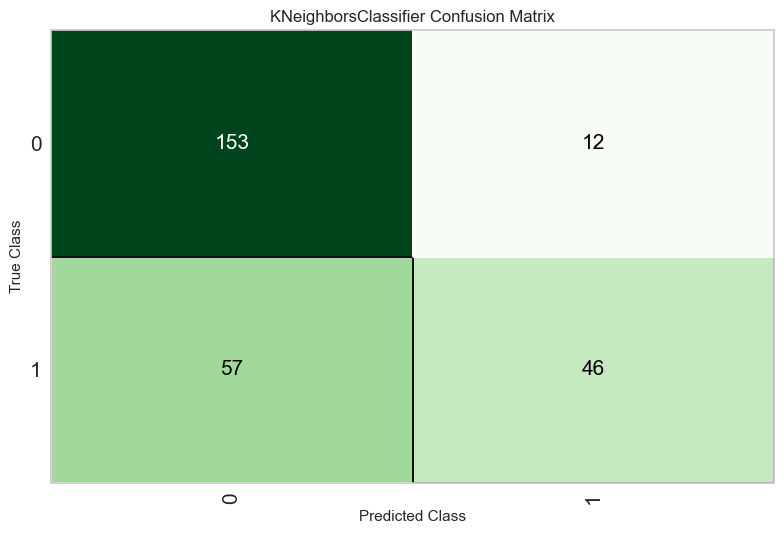

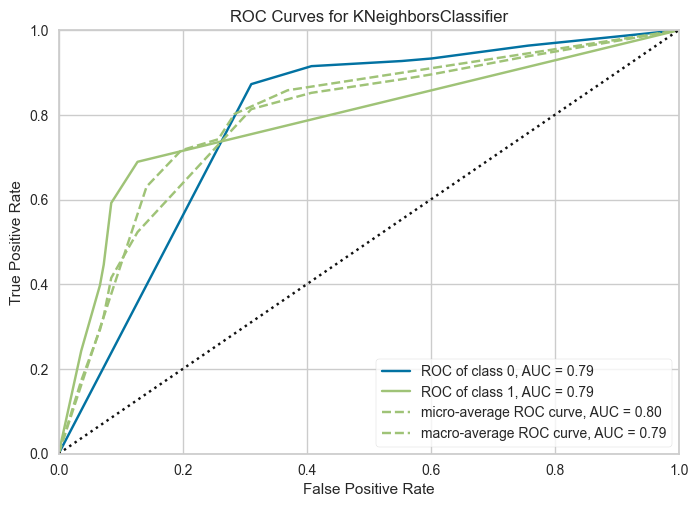

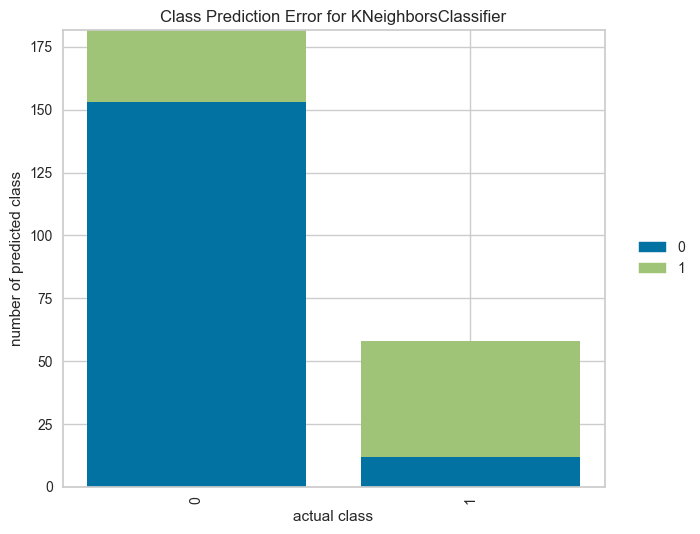

In [22]:
from pycaret.classification import *
from pycaret.classification import plot_model
from sklearn.metrics import mean_squared_error
import numpy as np
plot_model(loaded_best_pipline, plot='confusion_matrix')
plot_model(best, plot='auc')
plot_model(best, plot='error')
